In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline 
import os
from keras.models import Sequential
from keras.layers import Input, Dropout, Flatten, Convolution2D, MaxPooling2D, Dense, Activation
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import np_utils

import keras

In [ ]:
!unzip -q '/content/drive/My Drive/Colab Notebooks/Cat_Dog.zip' -d cat_vs_dog



# PREPARING DATA
* train dataset : train
* test dataset  : test
* train label   : label

## Load Data

In [ ]:
TRAIN_DOG_DIR = '/content/cat_vs_dog/Cat_Dog/train/Dog'
TRAIN_CAT_DIR = '/content/cat_vs_dog/Cat_Dog/train/Cat'
TEST_DIR = '/content/cat_vs_dog/Cat_Dog/test/test'
ROWS = 256
COLS = 256
CHANNELS = 3
# total_train_images = [os.path.join(TRAIN_DIR, i )for i in os.listdir(TRAIN_DIR)]
train_dogs = [os.path.join(TRAIN_DOG_DIR,i) for i in os.listdir(TRAIN_DOG_DIR)]
train_cats = [os.path.join(TRAIN_CAT_DIR,i) for i in os.listdir(TRAIN_CAT_DIR)]
total_test_images = [os.path.join(TEST_DIR,i) for i in os.listdir(TEST_DIR)]

In [ ]:
print(len(total_test_images),len(train_dogs),len(train_cats))

12500 11250 11250


In [ ]:
train_images = train_dogs + train_cats
# train_images.append('/content/Tiger2.jpg')
random.shuffle(train_images)
test_images =  total_test_images[:100]


In [ ]:
def read_image(file_path):
    image = cv2.imread(file_path)
    return cv2.resize(image,(ROWS,COLS),interpolation = cv2.INTER_CUBIC)
def prep_data(images):
    count = len(images)
    data = np.ndarray((count,ROWS,COLS,CHANNELS),dtype=np.uint8)
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0 : print('Processed {} of {}'.format(i,count))
    return data
train = prep_data(train_images)
test = prep_data(test_images)
print("Train shape: {}",format(train.shape))
print("Test shape: {}",format(test.shape))

## Generating label

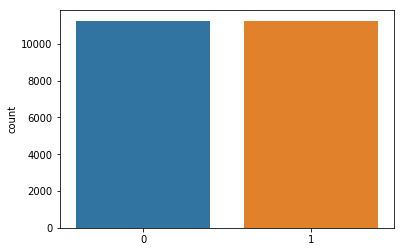

In [ ]:
# print(train_images)
labels = []
for i in train_images:
    path = i.split('/')
    if 'dog' in path[-1] :
        labels.append(1)
    else:
        labels.append(0)

sns.countplot(labels)
# sns.plt.title('Cats and Dogs')

In [ ]:
# print(labels)
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)    # one hot
labels.shape

(22500, 2)

## Checking out cat & dog

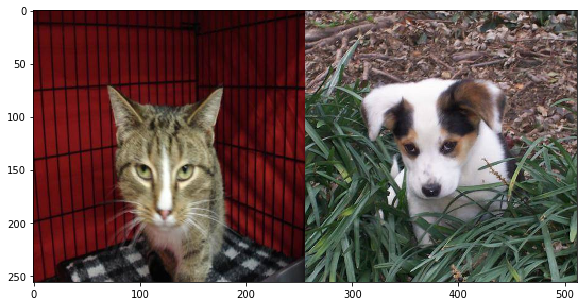

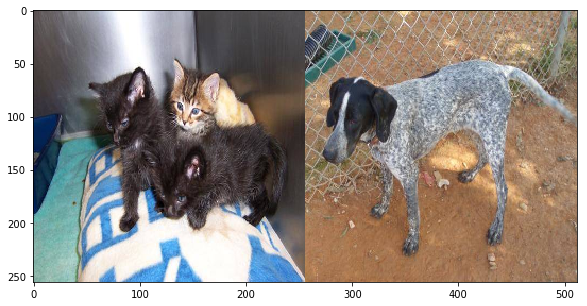

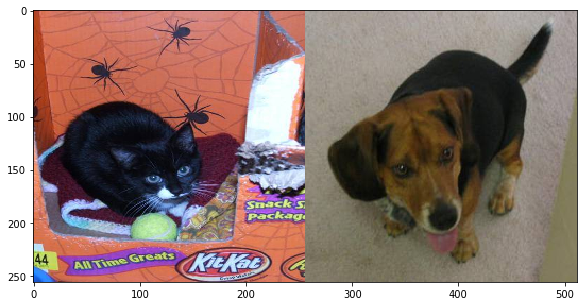

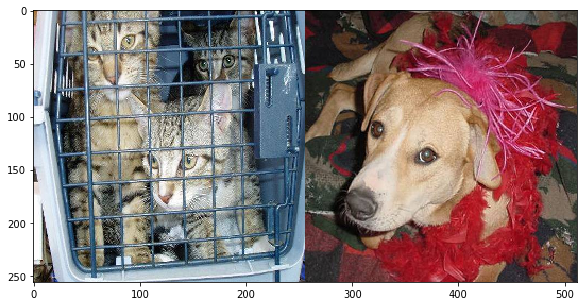

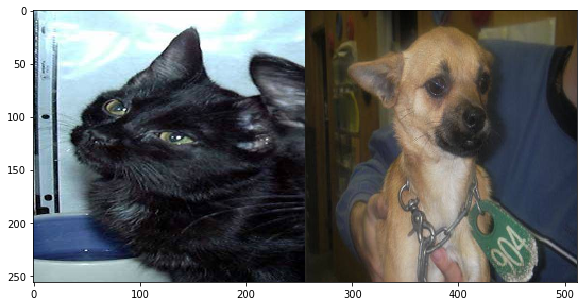

In [ ]:
def show_cats_and_dogs(idx):
    cat = read_image(train_cats[idx])
    dog = read_image(train_dogs[idx])
    pair = np.concatenate((cv2.cvtColor(cat,cv2.COLOR_BGR2RGB),cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)),axis=1)
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for idx in range(5):
    show_cats_and_dogs(idx)

# VGG






## VGG - Tự chế

In [ ]:
optimizer = keras.optimizers.Adamax(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
objective = 'binary_crossentropy'
def catdog():
    model = Sequential()
    model.add(Convolution2D(32,3,3,border_mode='same',input_shape=(ROWS,COLS,3),activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(128, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
#     model.add(Convolution2D(256, 3, 3, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss=objective, optimizer=optimizer, metrics=['accuracy'])
    return model
VGG13 = catdog()

In [ ]:
VGG13.summary()

In [ ]:
VGG13.fit(train , labels , batch_size=16, epochs=10 , validation_split=0.1,shuffle=True)

Train on 20250 samples, validate on 2250 samples
Epoch 1/10
20250/20250 [==============================] - 256s 13ms/step - loss: 0.6689 - acc: 0.5838 - val_loss: 0.5872 - val_acc: 0.6924
Epoch 2/10
20250/20250 [==============================] - 256s 13ms/step - loss: 0.5828 - acc: 0.6905 - val_loss: 0.5403 - val_acc: 0.7400
Epoch 3/10
20250/20250 [==============================] - 255s 13ms/step - loss: 0.5300 - acc: 0.7366 - val_loss: 0.5467 - val_acc: 0.7284
Epoch 4/10
20250/20250 [==============================] - 256s 13ms/step - loss: 0.4665 - acc: 0.7798 - val_loss: 0.4393 - val_acc: 0.7893
Epoch 5/10
20250/20250 [==============================] - 255s 13ms/step - loss: 0.3992 - acc: 0.8213 - val_loss: 0.3573 - val_acc: 0.8396
Epoch 6/10
20250/20250 [==============================] - 255s 13ms/step - loss: 0.3406 - acc: 0.8540 - val_loss: 0.3257 - val_acc: 0.8551
Epoch 7/10
20250/20250 [==============================] - 256s 13ms/step - loss: 0.2940 - acc: 0.8766 - val_loss: 0.2

I am sure this is a Cat


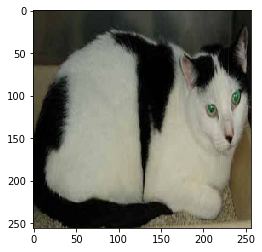

0.9556114


In [ ]:
index = 82
# img = read_image('/content/cat.lion1.jpg')
predict = VGG13.predict(test[index].reshape((1,ROWS,COLS,CHANNELS)))
if np.argmax(predict)==1: 
  print('I am sure this is a Dog')
else:      
  print('I am sure this is a Cat')
        
plt.imshow(cv2.cvtColor(test[index],cv2.COLOR_BGR2RGB))
plt.show()
print(predict[0][0]-predict[0][1])

## VGG - keras

In [ ]:
# model_keras = keras.applications.vgg16.VGG16(include_top=False,weights="imagenet" ,input_shape=(128,128,3),pooling=None)

In [ ]:
VGG16_keras = keras.applications.vgg16.VGG16(include_top=False,weights="imagenet" ,input_shape=(224,224,3),pooling=None)
for layer in VGG16_keras.layers:
  layer.trainable = False
VGG16_keras.summary()

In [ ]:
keras_VGG16 = keras.models.Sequential([
    VGG16_keras,
    Flatten(),
    Dense(512, activation='relu', name='fc1'),
    Dropout(0.5),
    Dense(2,activation='softmax', name='predictions')
])

In [ ]:
keras_VGG16.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_9 (Flatten)          (None, 32768)             0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               16777728  
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
predictions (Dense)          (None, 2)                 1026      
Total params: 31,493,442
Trainable params: 16,778,754
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
keras_VGG16.compile(optimizer=keras.optimizers.Adam(1e-4), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
# keras_vgg16.fit(train,labels,validation_split = 0.1,batch_size = 32, epochs = 8)
keras_VGG16.fit(train , labels , batch_size=16, epochs=8 , validation_split=0.1,shuffle=True)

Train on 20250 samples, validate on 2250 samples
Epoch 1/8
20250/20250 [==============================] - 284s 14ms/step - loss: 0.8462 - acc: 0.9421 - val_loss: 0.4516 - val_acc: 0.9707
Epoch 2/8
20250/20250 [==============================] - 280s 14ms/step - loss: 0.6145 - acc: 0.9601 - val_loss: 0.6521 - val_acc: 0.9573
Epoch 3/8
20250/20250 [==============================] - 281s 14ms/step - loss: 0.5550 - acc: 0.9641 - val_loss: 0.7233 - val_acc: 0.9538
Epoch 4/8
20250/20250 [==============================] - 281s 14ms/step - loss: 0.5414 - acc: 0.9655 - val_loss: 0.3666 - val_acc: 0.9769
Epoch 5/8
20250/20250 [==============================] - 280s 14ms/step - loss: 0.4572 - acc: 0.9707 - val_loss: 0.6593 - val_acc: 0.9587
Epoch 6/8
20250/20250 [==============================] - 281s 14ms/step - loss: 0.4218 - acc: 0.9727 - val_loss: 0.4475 - val_acc: 0.9711
Epoch 7/8
20250/20250 [==============================] - 280s 14ms/step - loss: 0.4108 - acc: 0.9738 - val_loss: 0.6679 - v

# RESNET

In [ ]:
base_model = keras.applications.resnet.ResNet50(weights= 'imagenet', include_top=False, input_shape= (ROWS,COLS,3))

94773248/94765736 [==============================] - 9s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation= 'softmax')(x)
model = keras.models.Model(inputs = base_model.input, outputs = predictions)

In [ ]:
model.summary()

In [ ]:
from keras.optimizers import SGD, Adam
# sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
rmsprop = keras.optimizers.RMSprop(lr=0.0001)
model.compile(optimizer= rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(train, labels, epochs = 4, batch_size = 64,validation_split=0.1,shuffle=True)

Train on 20250 samples, validate on 2250 samples
Epoch 1/4
20250/20250 [==============================] - 214s 11ms/step - loss: 0.3853 - acc: 0.8297 - val_loss: 0.0872 - val_acc: 0.9667
Epoch 2/4
20250/20250 [==============================] - 208s 10ms/step - loss: 0.1319 - acc: 0.9511 - val_loss: 0.0688 - val_acc: 0.9733
Epoch 3/4
20250/20250 [==============================] - 210s 10ms/step - loss: 0.0959 - acc: 0.9642 - val_loss: 0.0606 - val_acc: 0.9747
Epoch 4/4
20250/20250 [==============================] - 209s 10ms/step - loss: 0.0841 - acc: 0.9692 - val_loss: 0.0666 - val_acc: 0.9733


I am sure this is a Dog


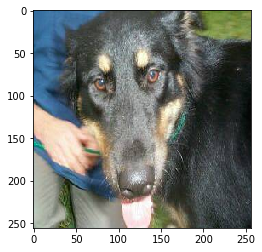

-0.99731785


In [ ]:
index = 6
# img = read_image('/content/cat.lion1.jpg')
predict = model.predict(test[index].reshape((1,ROWS,COLS,CHANNELS)))
if np.argmax(predict)==1: 
  print('I am sure this is a Dog')
else:      
  print('I am sure this is a Cat')
img = cv2.cvtColor(test[index],cv2.COLOR_BGR2RGB)        
plt.imshow(img)
plt.show()
print(predict[0][0]-predict[0][1])

# INCEPTION


## Inception v3

In [ ]:
InceptionV3 = keras.applications.inception_v3.InceptionV3(include_top = False, weights='imagenet',input_shape=(ROWS,COLS,3), classes=2)

In [ ]:
x = InceptionV3.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(2, activation= 'softmax')(x)
InceptionV3_model = ctivation= 'softmax')(x)
InceptionV3_model = keras.models.Model(inputs = InceptionV3.input, outputs = predictions)

In [ ]:
InceptionV3_model.summary()

In [ ]:
from keras.optimizers import SGD, Adam
rmsprop = keras.optimizers.RMSprop(lr=0.0001)
InceptionV3_model.compile(optimizer= rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
InceptionV3_model.fit(train,labels, epochs = 3, batch_size = 16,shuffle=True,validation_split = 0.1)

Train on 20250 samples, validate on 2250 samples
Epoch 1/3
20250/20250 [==============================] - 731s 36ms/step - loss: 0.0851 - acc: 0.9730 - val_loss: 0.0493 - val_acc: 0.9898
Epoch 2/3
20250/20250 [==============================] - 699s 35ms/step - loss: 0.0359 - acc: 0.9889 - val_loss: 0.1440 - val_acc: 0.9773
Epoch 3/3
20250/20250 [==============================] - 702s 35ms/step - loss: 0.0303 - acc: 0.9932 - val_loss: 0.1334 - val_acc: 0.9791


I am sure this is a Cat


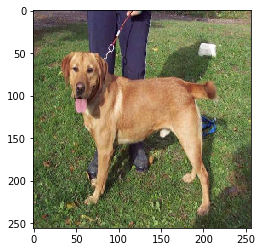

1.0
dog


In [ ]:
index = 9
label_name=["cat","dog"]
predict = InceptionV3_model.predict(train[index].reshape((1,ROWS,COLS,CHANNELS)))
if np.argmax(predict)==1: 
  print('I am sure this is a Dog')
else:      
  print('I am sure this is a Cat')
img = cv2.cvtColor(train[index],cv2.COLOR_BGR2RGB)        
plt.imshow(img)
plt.show()
print(predict[0][0]-predict[0][1])
print(label_name[np.argmax(labels[index])])

In [ ]:
InceptionV3_model.evaluate(train,labels)

22500/22500 [==============================] - 167s 7ms/step


[8.038798379177518, 0.5001333333333333]

## Inception - ResNet

In [ ]:
incep_res = keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=(ROWS,COLS,3), classes=2)

In [ ]:
for layer in incep_res.layers[:15]:
  layer.trainable = False
x = incep_res.output
x = keras.layers.GlobalAveragePooling2D()(x)
Dense(128, activation= 'relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation= 'softmax')(x)
Inception_Resnet_model = keras.models.Model(inputs = incep_res.input, outputs = predictions)

In [ ]:
Inception_Resnet_model.summary()

In [ ]:
Inception_Resnet_model.compile(optimizer = keras.optimizers.adam(lr=1e-4),
                               loss='categorical_crossentropy',
                               metrics = ['accuracy'])

In [ ]:
Inception_Resnet_model.fit(train,labels,validation_split=0.2,batch_size=16,epochs=1)

Train on 18000 samples, validate on 4500 samples
Epoch 1/1
18000/18000 [==============================] - 1434s 80ms/step - loss: 0.0618 - acc: 0.9782 - val_loss: 7.9014 - val_acc: 0.5098


# Mobile Net

In [ ]:
mobile_conv = keras.applications.mobilenet.MobileNet(input_shape=(ROWS,COLS,3), dropout=1e-3, include_top=False, weights='imagenet', classes=2)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [ ]:
x = mobile_conv.output
x = keras.layers.GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x = keras.layers.Dropout(0.5)(x) 
x = Dense(1024,activation='relu')(x) #dense layer 2
x = keras.layers.Dropout(0.5)(x) 
x = Dense(512,activation='relu')(x) #dense layer 3
predictions = Dense(2, activation= 'softmax')(x)
MobileNet_Model = keras.models.Model(inputs = mobile_conv.input, outputs = predictions) 



In [ ]:
MobileNet_Model.summary()

In [ ]:
MobileNet_Model.compile(optimizer=keras.optimizers.adam(lr=1e-4),
                        loss = "categorical_crossentropy",
                        metrics =["accuracy"])

In [ ]:
MobileNet_Model.fit(train,labels,validation_split=0.2,batch_size=16,epochs=5)

Train on 18000 samples, validate on 4500 samples
Epoch 1/5
18000/18000 [==============================] - 307s 17ms/step - loss: 0.1069 - acc: 0.9582 - val_loss: 0.0328 - val_acc: 0.9873
Epoch 2/5
18000/18000 [==============================] - 291s 16ms/step - loss: 0.0417 - acc: 0.9852 - val_loss: 0.0269 - val_acc: 0.9889
Epoch 3/5
18000/18000 [==============================] - 291s 16ms/step - loss: 0.0295 - acc: 0.9897 - val_loss: 0.0487 - val_acc: 0.9842
Epoch 4/5
18000/18000 [==============================] - 292s 16ms/step - loss: 0.0228 - acc: 0.9928 - val_loss: 0.0500 - val_acc: 0.9856
Epoch 5/5
18000/18000 [==============================] - 291s 16ms/step - loss: 0.0199 - acc: 0.9934 - val_loss: 0.0714 - val_acc: 0.9771


In [ ]:
labels_predict =MobileNet_Model.predict(train)

In [ ]:
MobileNet_Model.evaluate(train,labels)

22500/22500 [==============================] - 86s 4ms/step


[0.026792945912533388, 0.9911111111111112]